In [44]:
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA , KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
import scipy.cluster.hierarchy as shc
import csv
import pickle
from scipy.stats import entropy
from sklearn.metrics import mean_squared_error
from math import sqrt

In [46]:
elastic_net = './prediction_per_cell_EN.csv'
elastic_net = pd.read_csv(elastic_net)

tissue  = './tissue_label_gdsc_ID.csv'
tissue  = pd.read_csv(tissue)

In [47]:
tissue.rename(columns={'Unnamed: 0': 'Cell line ID'},inplace=True)

In [5]:
tissue = tissue.loc[:,["tissue","CosmicID"]]
EN = pd.merge(elastic_net , tissue,left_on = "name", right_on = "CosmicID")
EN = EN.loc[:, EN.columns != "CosmicID"]
#SNP.reset_index(drop=True, inplace=True)

In [12]:
Plot = EN.groupby(['tissue']).median().reset_index()

In [14]:
order_co_test = Plot.sort_values('corr_test')
names_co_test = order_co_test['tissue']

In [26]:
EN.groupby(['tissue']).count().reset_index()

,tissue,Unnamed: 0,name,RMSE_train,RMSE_test,corr_train,corr_test
0,Bladder,19,19,19,19,19,19
1,aero_dig_tract,73,73,73,73,73,73
2,biliary_tract,5,5,5,5,5,5
3,bone,38,38,38,38,38,38
4,breast,50,50,50,50,50,50
5,cervix,15,15,15,15,15,15
6,endometrium,11,11,11,11,11,11
7,kidney,33,33,33,33,33,33
8,large_intestine,48,48,48,48,48,48
9,leukemia,81,81,81,81,81,81


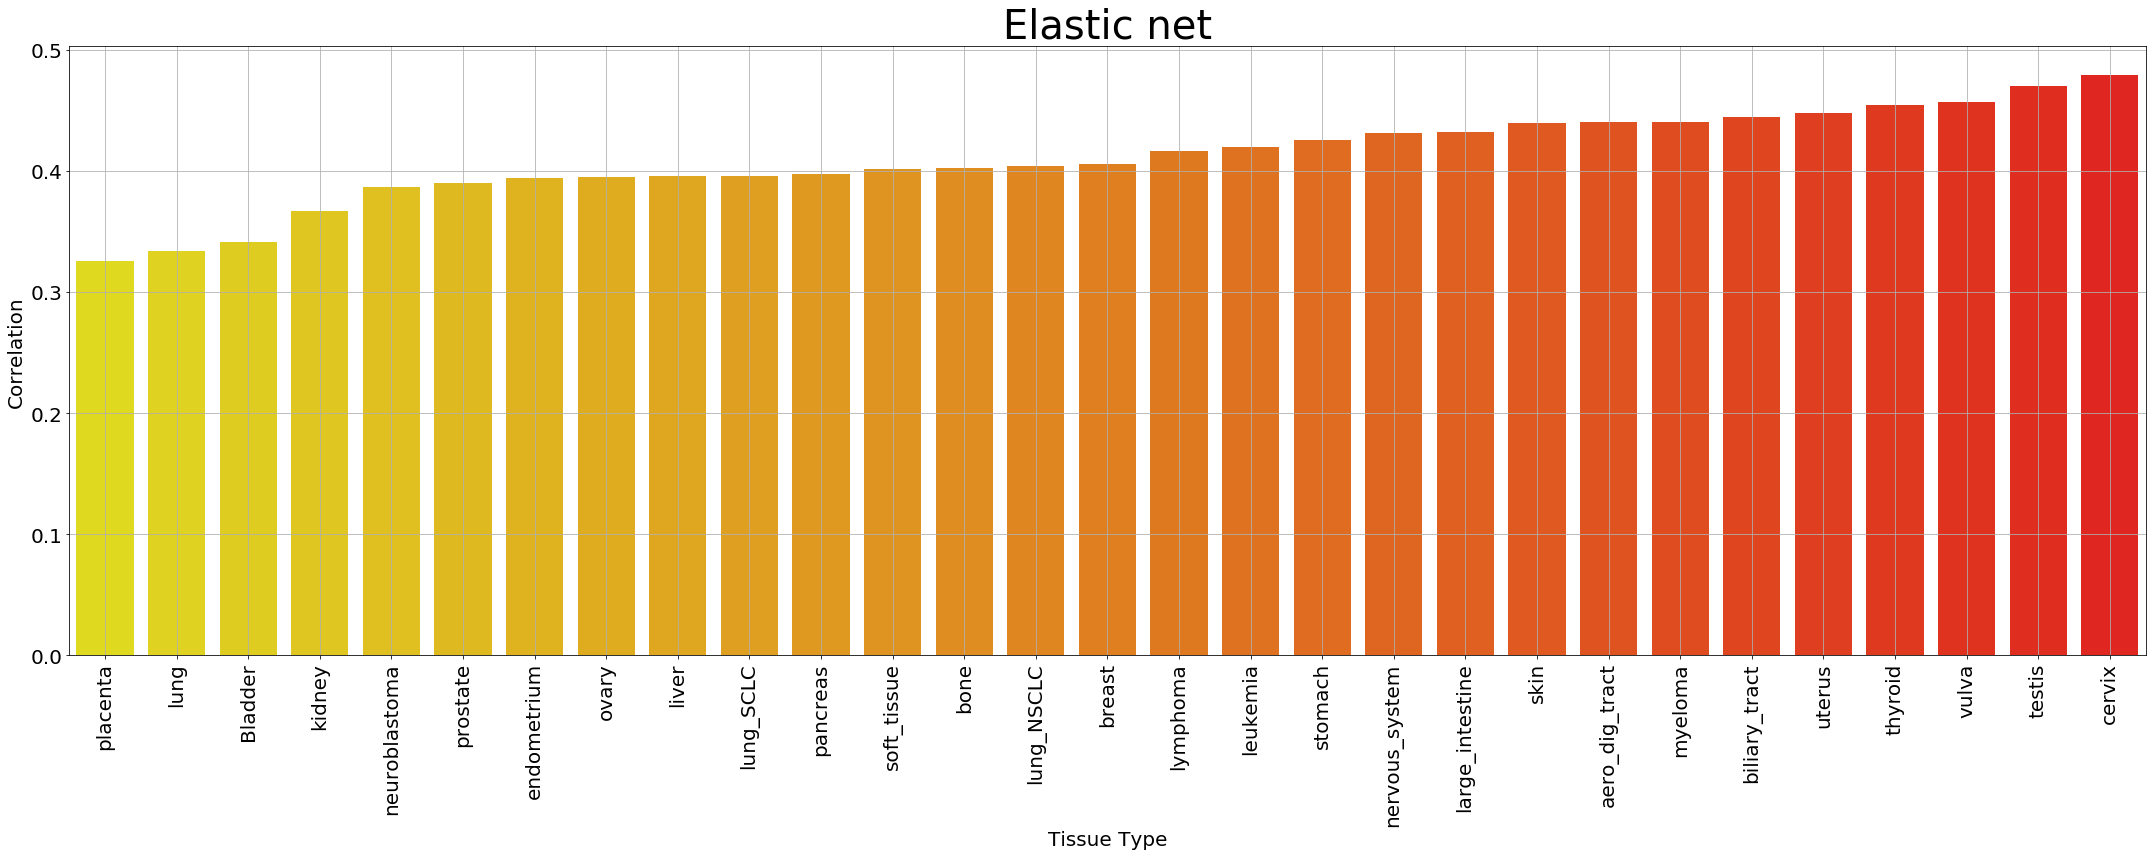

In [25]:
plt.figure(figsize = (30,12))
sns.barplot(x = 'tissue', y = 'corr_test', data =Plot, 
           order = names_co_test,palette='autumn_r')
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.legend(loc = 2, fontsize = 20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20, markerscale = 2)
plt.xlabel('Tissue Type',fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Elastic net', fontsize = 40)
#plt.text(-0.2, 0.9, 'a',
 #           size=30, weight='bold')

plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig('EN-res.pdf')

In [30]:
elastic_net1 = './prediction_per_drug_progeny_EN.csv'
elastic_net1 = pd.read_csv(elastic_net1)

elastic_net2 = './prediction_all_progeny_EN.csv'
elastic_net2 = pd.read_csv(elastic_net2)

targets = './Screened_Compounds.csv'
targets=pd.read_csv(targets)

In [25]:
merged = pd.concat([elastic_net1.assign(dataset = 'EN+DRUG'), elastic_net2.assign(dataset = 'EN+ALLDATA')], sort = True)
order_c_test = elastic_net1.groupby(["name"])['corr_test'].aggregate(np.median).reset_index().sort_values('corr_test')
names_c_test = order_c_test['name'][:70]

# merged_xgb = pd.concat([xgboost.assign(dataset = 'XGB+L'), xgboost1.assign(dataset = 'XGB+CD')], sort = True)
# order_co_test = xgboost.groupby(["name"])['corr_test'].aggregate(np.median).reset_index().sort_values('corr_test')
# names_co_test = order_co_test['name']

In [26]:
names_c_test = order_c_test['name'][180:]
merged=merged.loc[merged['name'].isin(names_c_test)]

In [27]:
merged

,RMSE_test,RMSE_train,Unnamed: 0,corr_test,corr_train,dataset,name
6,0.198322,0.183150,Cyclopamine,0.398173,0.403750,EN+DRUG,Cyclopamine
7,0.164369,0.160930,AZ628,0.518375,0.552680,EN+DRUG,AZ628
21,0.172251,0.170357,WH-4-023,0.367984,0.376803,EN+DRUG,WH-4-023
33,0.123930,0.124388,KIN001-135,0.380837,0.389673,EN+DRUG,KIN001-135
34,0.149884,0.133810,TGX221,0.393246,0.461561,EN+DRUG,TGX221
...,...,...,...,...,...,...,...
245,0.154894,0.155617,Trametinib,-0.142450,-0.130538,EN+ALLDATA,Trametinib
246,0.082864,0.086250,Dabrafenib,0.228591,0.223494,EN+ALLDATA,Dabrafenib
247,0.035012,0.032796,Temozolomide,0.355655,0.398011,EN+ALLDATA,Temozolomide
248,0.085349,0.085697,Afatinib (rescreen),-0.175129,-0.162958,EN+ALLDATA,Afatinib (rescreen)


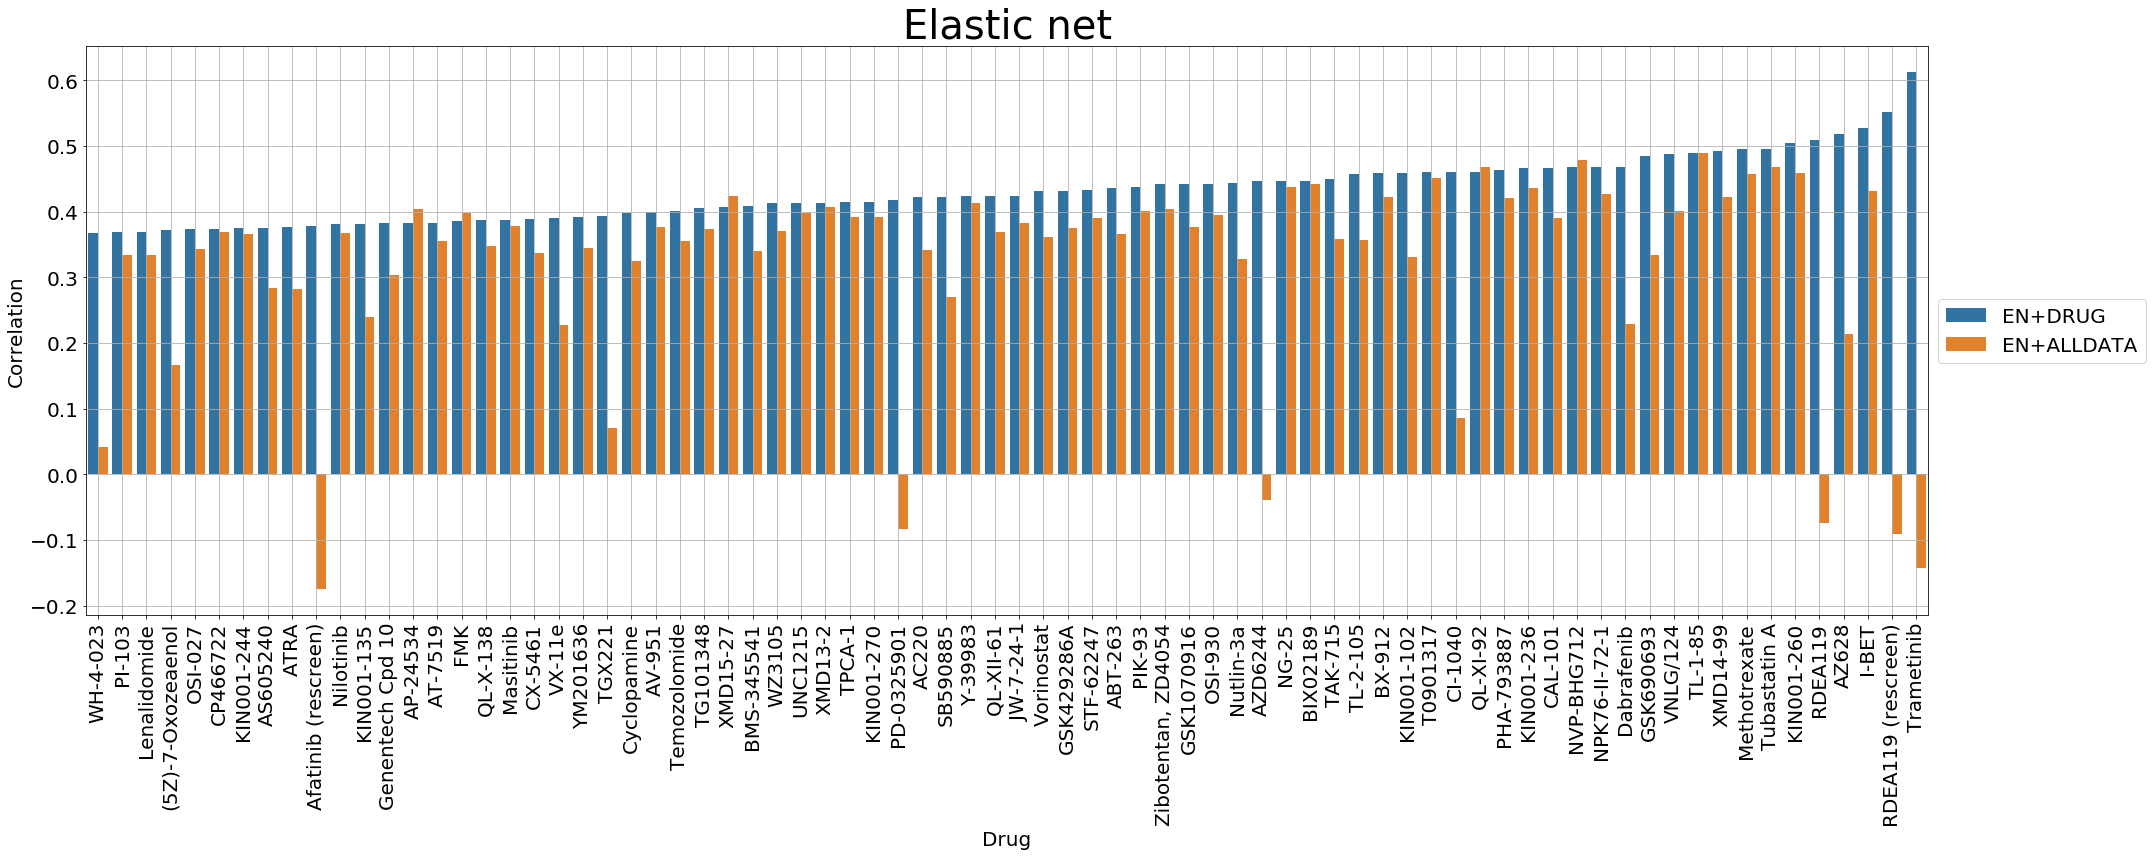

In [28]:
plt.figure(figsize = (30,12))
sns.barplot(x = 'name', y = 'corr_test', data =merged, 
            hue = 'dataset',  order = names_c_test)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.legend(loc = 2, fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20, markerscale = 2)
plt.xlabel('Drug',fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Elastic net', fontsize = 40)
#plt.text(-0.2, 0.9, 'a',
 #           size=30, weight='bold')

plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig('EN-res-drugs.pdf')

In [31]:
targets

,Drug ID,Drug Name,Synonyms,Target,Target Pathway
0,1,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
1,3,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
2,5,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
3,6,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
4,9,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation
...,...,...,...,...,...
260,1498,Selumetinib,"AZD6244, AZD-6244, ARRY-886","MEK1, MEK2",ERK MAPK signaling
261,1502,Bicalutamide,"ICI-176334, Casodex, Cosudex, ICI 176334",AR,Hormone-related
262,1526,Refametinib,"RDEA119, BAY-86-9766, BAY 869766","MEK1, MEK2",ERK MAPK signaling
263,1527,Pictilisib,"GDC-0941, GDC0941, RG-7621",PI3K (class 1),PI3K/MTOR signaling


In [32]:
targets= targets.loc[:,["Drug Name","Target Pathway"]]
EN = pd.merge(elastic_net1 , targets,left_on = "name", right_on = "Drug Name")
EN = EN.loc[:, EN.columns != "Dryug Name"]

In [33]:
Plot = EN.groupby(['Target Pathway']).median().reset_index()

In [35]:
order_co_test = Plot.sort_values('corr_test')
names_co_test = order_co_test['Target Pathway']

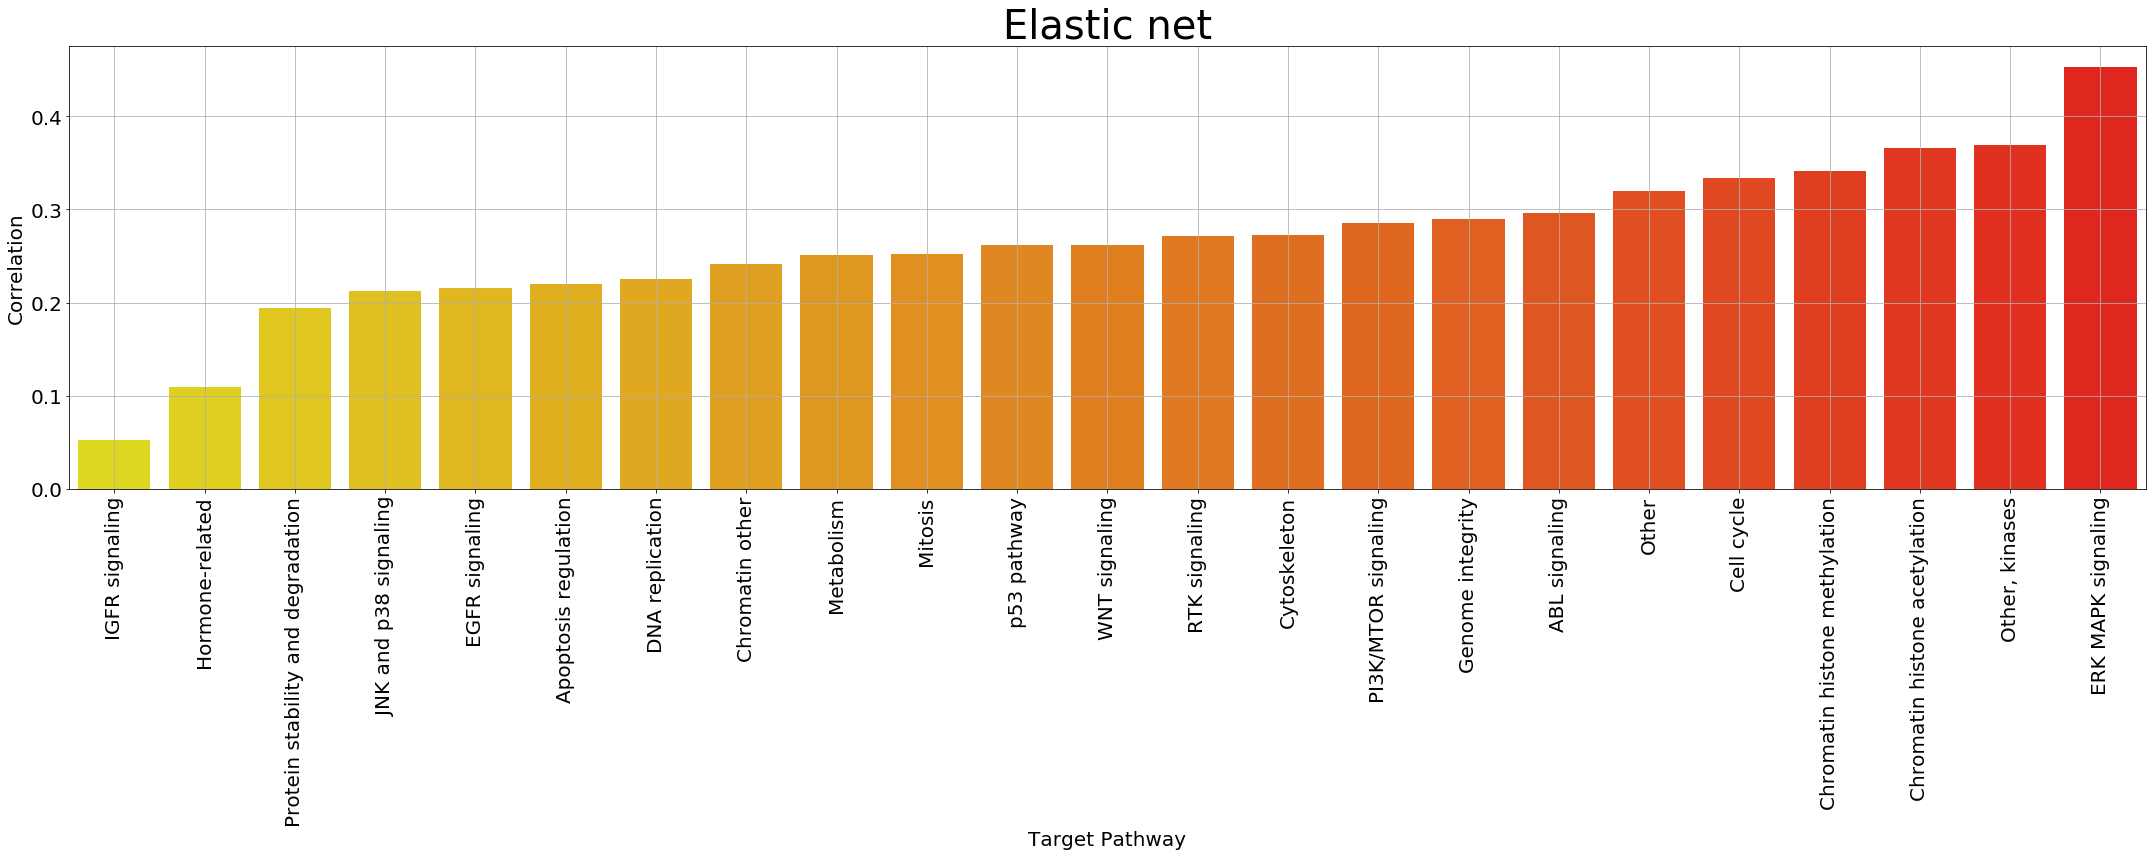

In [36]:
plt.figure(figsize = (30,12))
sns.barplot(x = 'Target Pathway', y = 'corr_test', data =Plot, 
           order = names_co_test,palette='autumn_r')
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.legend(loc = 2, fontsize = 20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20, markerscale = 2)
plt.xlabel('Target Pathway',fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Elastic net', fontsize = 40)
#plt.text(-0.2, 0.9, 'a',
 #           size=30, weight='bold')

plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig('EN-res-pathways.pdf')

In [38]:
xgboost = './prediction_per_drug_progeny_XGBoost.csv'
xgboost = pd.read_csv(xgboost)

In [39]:
XGB = pd.merge(xgboost , targets,left_on = "name", right_on = "Drug Name")
XGB = XGB.loc[:, XGB.columns != "Dryug Name"]
Plot = XGB.groupby(['Target Pathway']).median().reset_index()
order_co_test = Plot.sort_values('corr_test')
names_co_test = order_co_test['Target Pathway']

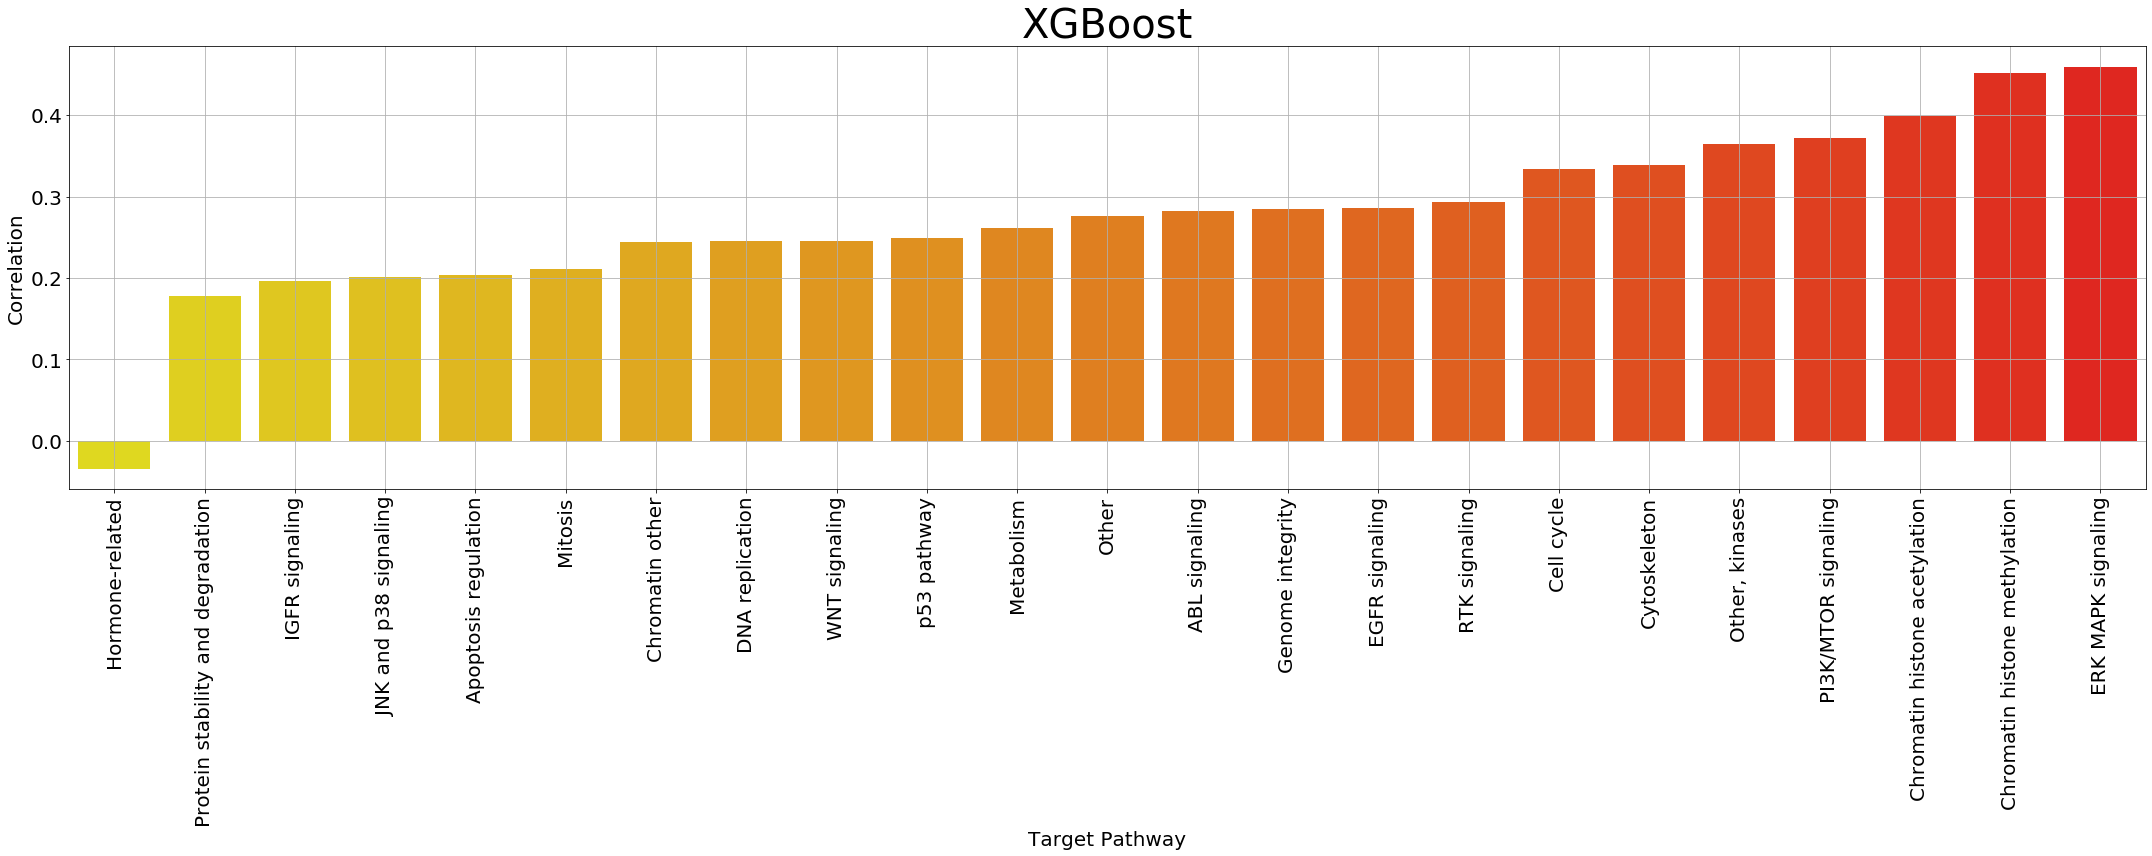

In [41]:
plt.figure(figsize = (30,12))
sns.barplot(x = 'Target Pathway', y = 'corr_test', data =Plot, 
           order = names_co_test,palette='autumn_r')
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.legend(loc = 2, fontsize = 20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20, markerscale = 2)
plt.xlabel('Target Pathway',fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('XGBoost', fontsize = 40)
#plt.text(-0.2, 0.9, 'a',
 #           size=30, weight='bold')

plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig('XGB-res-pathways.png')

In [42]:
xgboost1 = './prediction_per_cell_XGBoost.csv'
xgboost1 = pd.read_csv(xgboost1)

In [48]:
tissue = tissue.loc[:,["tissue","CosmicID"]]
EN = pd.merge(xgboost1 , tissue,left_on = "name", right_on = "CosmicID")
EN = EN.loc[:, EN.columns != "CosmicID"]
Plot = EN.groupby(['tissue']).median().reset_index()
order_co_test = Plot.sort_values('corr_test')
names_co_test = order_co_test['tissue']

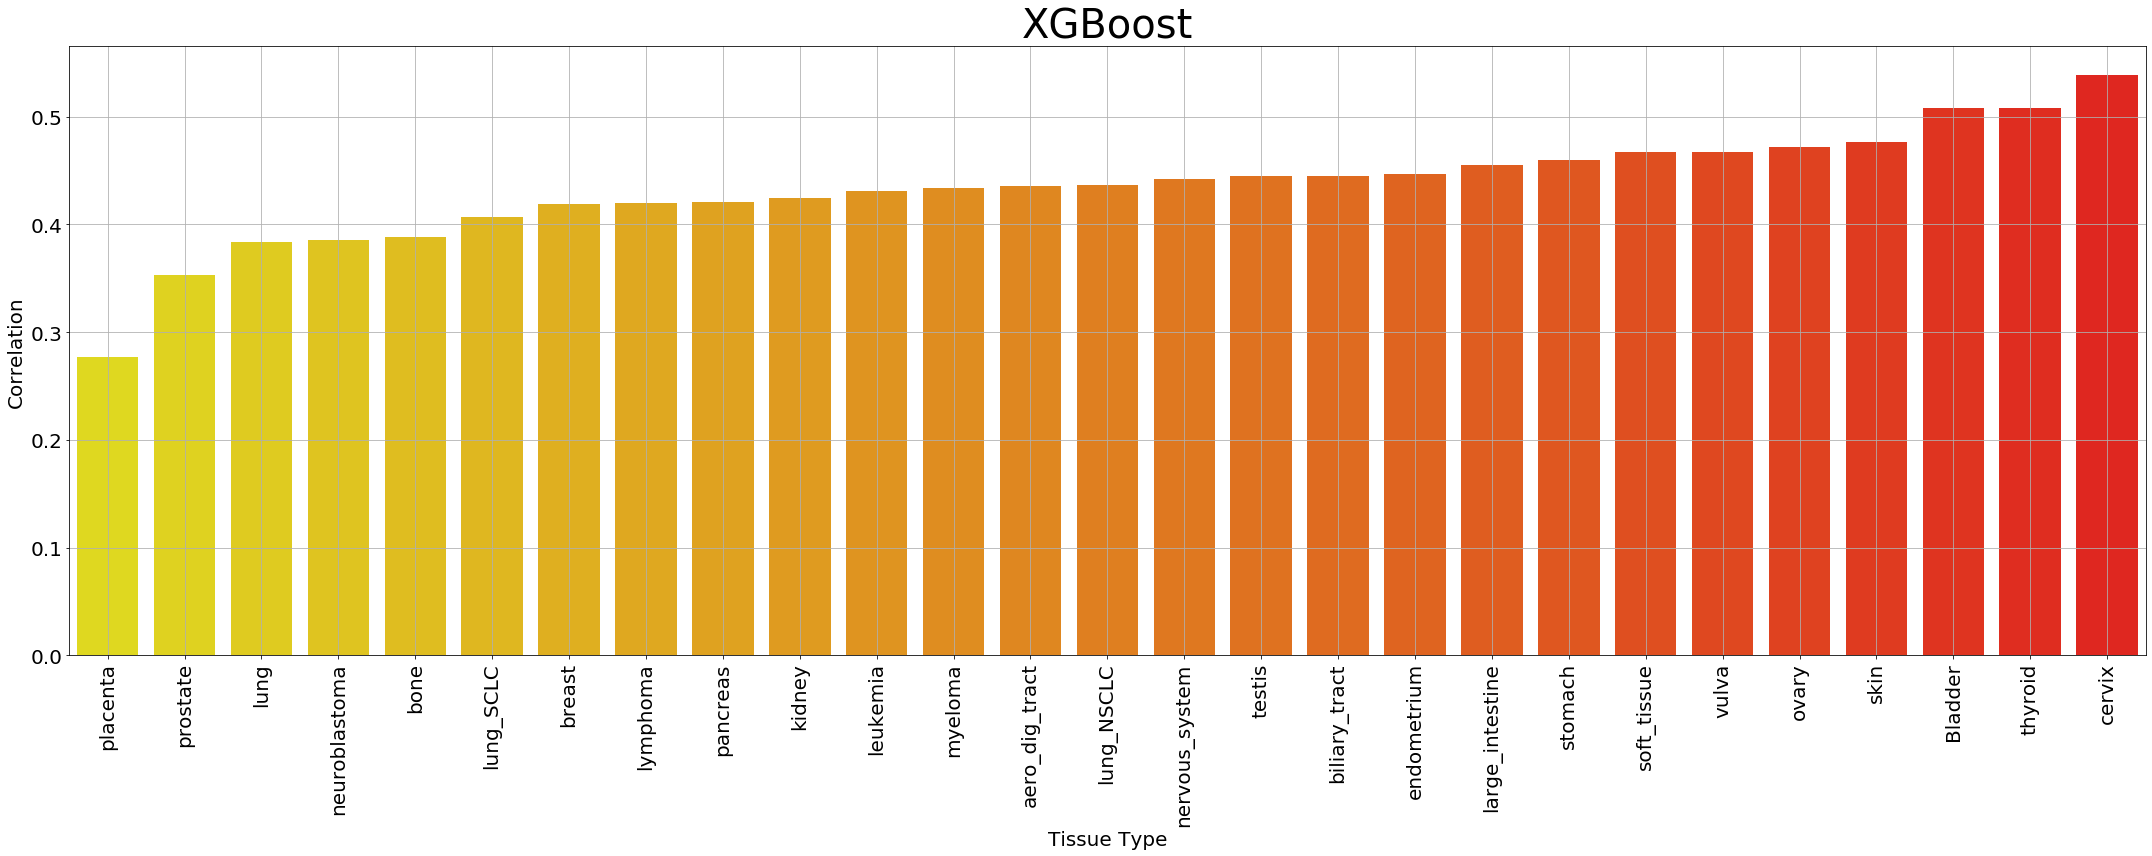

In [50]:
plt.figure(figsize = (30,12))
sns.barplot(x = 'tissue', y = 'corr_test', data =Plot, 
           order = names_co_test,palette='autumn_r')
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.legend(loc = 2, fontsize = 20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20, markerscale = 2)
plt.xlabel('Tissue Type',fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('XGBoost', fontsize = 40)
#plt.text(-0.2, 0.9, 'a',
 #           size=30, weight='bold')

plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig('XGB-res-tisssue.png')

In [63]:
#merged_xgb = pd.concat([xgboost.assign(dataset = 'XGB+DRUG'), xgboost2.assign(dataset = 'XGB+ALLDATA')], sort = True)
order_co_test = xgboost.groupby(["name"])['corr_test'].aggregate(np.median).reset_index().sort_values('corr_test')
order = xgboost.groupby(["name"])['corr_test'].aggregate(np.median).reset_index().sort_values('corr_test')
#names_co_test = order_co_test['name']

In [65]:
#names_c_test = order_c_test['name'][180:]
names=order['name'][180:]
merged=xgboost.loc[xgboost['name'].isin(names)]

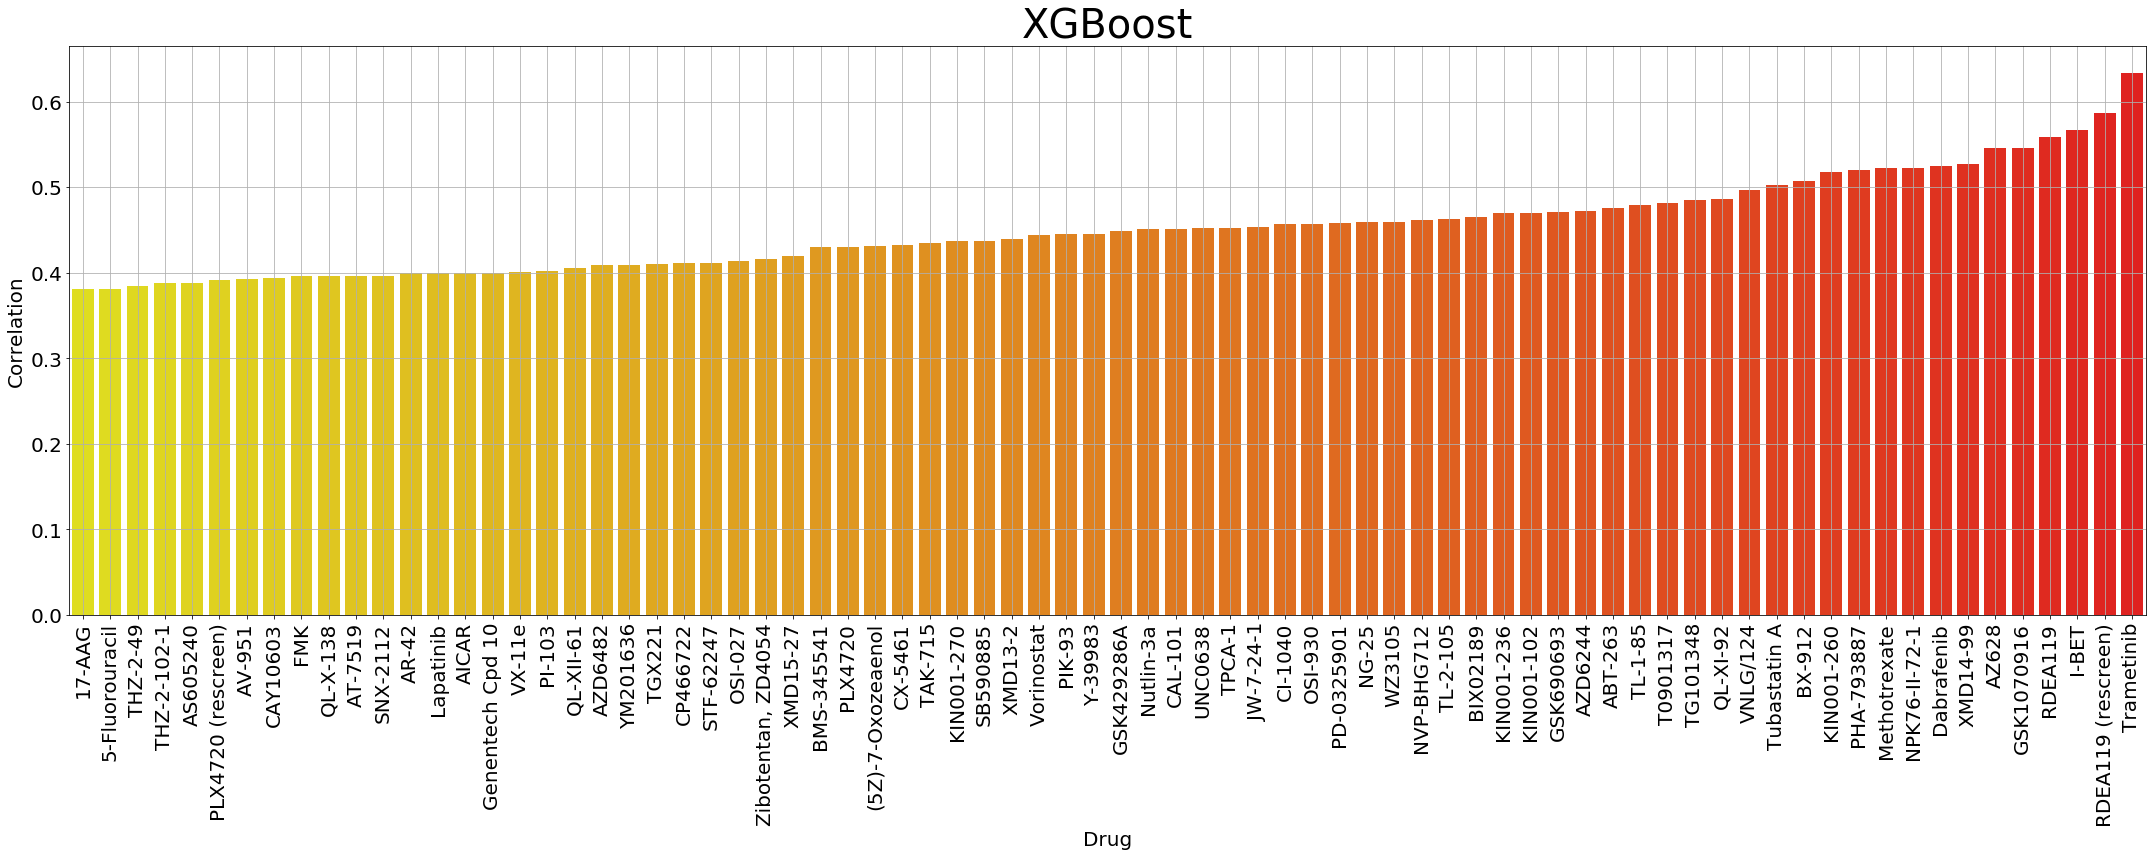

In [67]:
plt.figure(figsize = (30,12))
sns.barplot(x = 'name', y = 'corr_test', data =merged, 
            order = names,palette='autumn_r')
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.legend(loc = 2, fontsize = 20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20, markerscale = 2)
plt.xlabel('Drug',fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('XGBoost', fontsize = 40)
#plt.text(-0.2, 0.9, 'a',
 #           size=30, weight='bold')

plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig('XGB-res-drugs.png')